# Aim: Write a program to implement multiple linear regression on the dataset Boston.csv

In [7]:
#CRIM: PER CRIME RATE BY TOWN
#Nox: nitrogen oxides.concentration (parts per 10 million)
#drs: proportion of owner occupiede
#ptratio: pupil teacher ratio by town
#lstate: lower status of the population
#medv: medium value of owner occupied per thousands it's a dependent variable

#Start
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
boston=pd.read_csv("C:\\Users\\naren\\Boston.csv")
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
boston.info

<bound method DataFrame.info of      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         502  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         503  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         504  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         505  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         506  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     ta

In [8]:
boston=boston.drop(columns="Unnamed: 0")
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [14]:
boston_x=pd.DataFrame(boston.iloc[:,:13]) #iloc stands for index location(it;s slicing of data normally, before coma it's row after it is column)
boston_y=pd.DataFrame(boston.iloc[:,-1])
boston_x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [15]:
boston_y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(boston_x,boston_y,test_size=0.3)
print("xtrain shape",X_train.shape)
print("ytrain shape",Y_train.shape)
print("xtest shape",X_test.shape)
print("ytest shape",Y_test.shape)

xtrain shape (354, 13)
ytrain shape (354, 1)
xtest shape (152, 13)
ytest shape (152, 1)


In [19]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)
Y_pred_linear=regression.predict(X_test)
Y_pred_df=pd.DataFrame(Y_pred_linear,columns=["Predicted"])
Y_pred_df.head()

,Predicted
0,20.247301
1,18.283818
2,25.675981
3,19.378388
4,17.258289


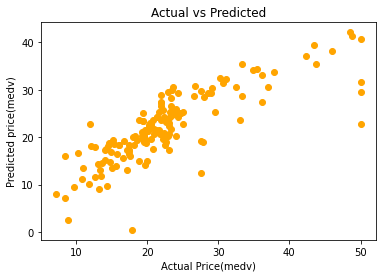

In [21]:
plt.scatter(Y_test,Y_pred_linear,c="Orange")
plt.xlabel("Actual Price(medv)")
plt.ylabel("Predicted price(medv)")
plt.title("Actual vs Predicted")
plt.show()